In [6]:
import numpy as np
import pandas as pd
import scanpy as sc
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
adata = sc.read_loom('mese_data_Yike.loom', X_name='spliced', obs_names='cellID', var_names='GeneName', dtype='float32')
adata.obs_names_make_unique() 
adata

scanpy==1.6.0 anndata==0.7.4 umap==0.4.5 numpy==1.19.1 scipy==1.5.2 pandas==1.1.1 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 leidenalg==0.8.1


/usr/lib/python3.8/site-packages/loompy/loom_validator.py:48: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(path) as f:


AnnData object with n_obs × n_vars = 4403 × 18072
    obs: 'DC', 'Gender', 'Mousename', 'Plate', 'SortType', 'Time [days]', 'Timepoint', 'TimepointHO', 'Treatment', 'Well', '_index', 'cellRoughSubtype', 'cellSubtype', 'cellSubtypeOld', 'cellType', 'coverage', 'doublet', 'embed_endo_1', 'embed_endo_2', 'fastq', 'mese_tSNE_1', 'mese_tSNE_2', 'number_of_genes_1plusreads'
    var: 'Chromosome', 'Gene stable ID', 'Strand', '_index', 'missing_info', 'n_geneIds'

normalizing counts per cell
    finished (0:00:00)


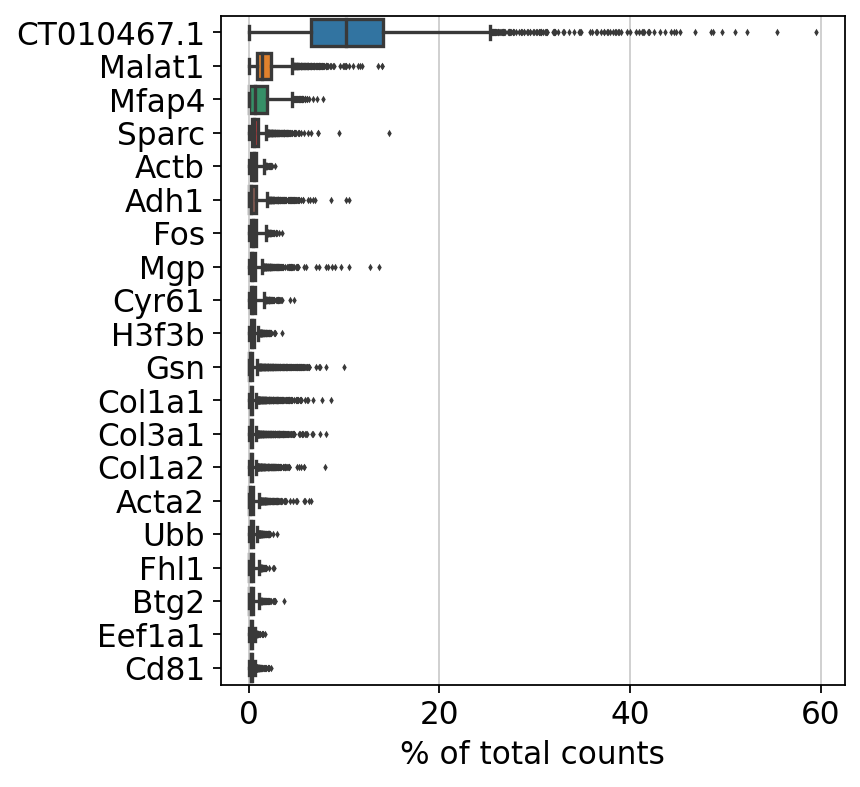

In [7]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [8]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata

/usr/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


filtered out 162 genes that are detected in less than 3 cells


AnnData object with n_obs × n_vars = 4403 × 17910
    obs: 'DC', 'Gender', 'Mousename', 'Plate', 'SortType', 'Time [days]', 'Timepoint', 'TimepointHO', 'Treatment', 'Well', '_index', 'cellRoughSubtype', 'cellSubtype', 'cellSubtypeOld', 'cellType', 'coverage', 'doublet', 'embed_endo_1', 'embed_endo_2', 'fastq', 'mese_tSNE_1', 'mese_tSNE_2', 'number_of_genes_1plusreads', 'n_genes'
    var: 'Chromosome', 'Gene stable ID', 'Strand', '_index', 'missing_info', 'n_geneIds', 'n_cells'

In [9]:
adata.var['mt'] = adata.var_names.str.startswith('Mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [38]:
tmp=adata.var_names.str.startswith('Mt') # annotate the group of mitochondrial genes as 'mt'
adata.var_names[tmp]

Index(['Mtfp1', 'Mthfd2', 'Mtmr1', 'Mtrex', 'Mtif3', 'Mtmr4', 'Mtrf1l',
       'Mtfr2', 'Mtif2', 'Mthfd1', 'Mta1', 'Mtr', 'Mterf3', 'Mtx3', 'Mtmr6',
       'Mtrf1', 'Mtdh', 'Mtss1', 'Mtbp', 'Mtch1', 'Mtpap', 'Mterf4', 'Mtx2',
       'Mtch2', 'Mtfr1', 'Mttp', 'Mtf1', 'Mtor', 'Mthfr', 'Mtf2', 'Mthfd2l',
       'Mtus2', 'Mtpn', 'Mtmr14', 'Mtmr10', 'Mtcp1', 'Mtm1', 'Mt3', 'Mt2',
       'Mt1', 'Mthfsd', 'Mtmr2', 'Mto1', 'Mtss1l', 'Mtmr3', 'Mtrr', 'Mtmr9',
       'Mturn', 'Mtg1', 'Mtg2', 'Mtmr7', 'Mtmr12', 'Mterf1a', 'Mthfd1l',
       'Mtus1', 'Mtmr11', 'Mtfr1l', 'Mterf2', 'Mtln', 'Mtcl1', 'Mterf1b',
       'Mta3', 'Mtfmt', 'Mtap', 'Mtx1', 'Mthfs', 'Mta2', 'Mthfsl', 'Mtag2'],
      dtype='object')

In [41]:
adata.var['Chromosome'].value_counts()

11            1483
2             1398
7             1386
5             1134
1             1091
4             1074
9             1000
6              987
8              935
3              864
10             844
17             838
13             700
15             694
12             646
14             639
X              590
19             579
16             556
18             451
Y                6
GL456210.1       4
GL456233.1       3
JH584293.1       2
GL456211.1       1
GL456212.1       1
GL456216.1       1
GL456221.1       1
JH584295.1       1
JH584304.1       1
Name: Chromosome, dtype: int64

In [42]:
adata.var['mt'].sum()

0

/usr/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'DC' as categorical
... storing 'Gender' as categorical
... storing 'Mousename' as categorical
... storing 'SortType' as categorical
... storing 'Time [days]' as categorical
... storing 'Timepoint' as categorical
... storing 'TimepointHO' as categorical
... storing 'Treatment' as categorical
... storing 'Well' as categorical
... storing 'cellRoughSubtype' as categorical
... storing 'cellSubtype' as categorical
... storing 'cellSubtypeOld' as categorical
... storing 'cellType' as categorical
... storing 'Chromosome' as categorical
... storing 'missing_info' as categorical


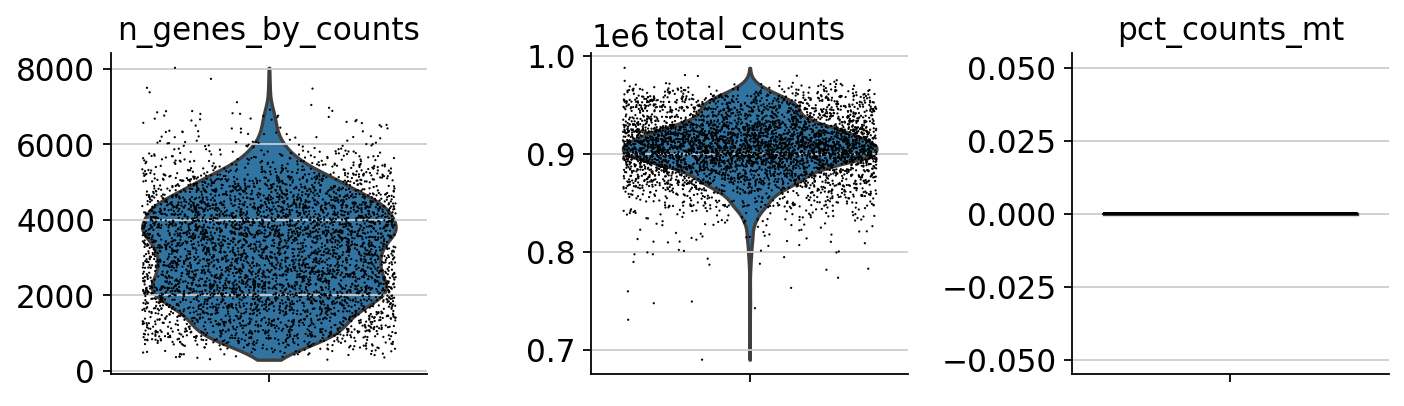

In [12]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

/usr/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


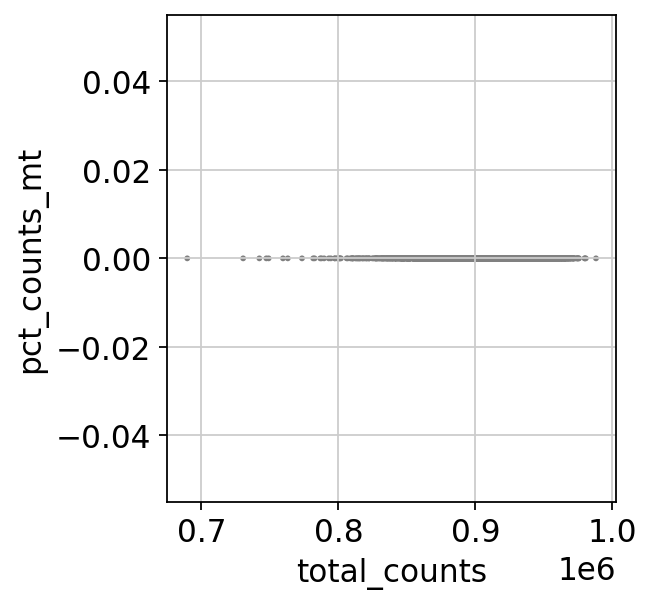

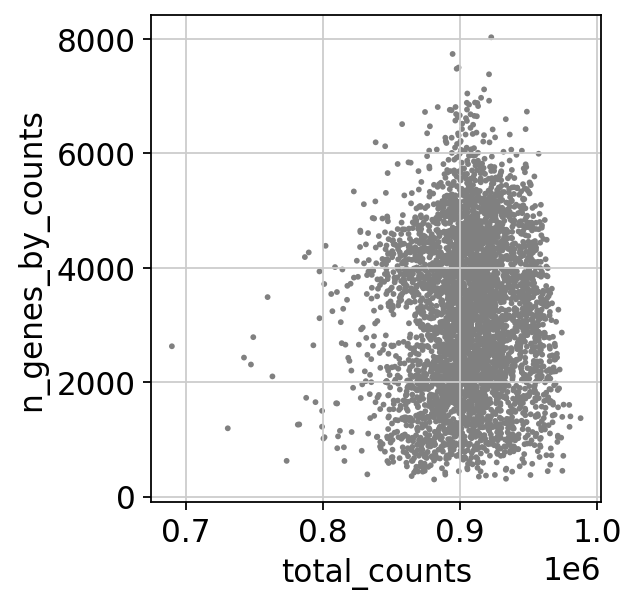

In [13]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [14]:
adata = adata[adata.obs.n_genes_by_counts<2500,:]
adata = adata[adata.obs.pct_counts_mt < 1, :]

/usr/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/usr/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [24]:
sc.pp.normalize_total(adata, target_sum=1e6)

normalizing counts per cell
    finished (0:00:00)


In [1]:
sc.pp.log1p(adata)

NameError: name 'sc' is not defined

In [19]:
adata.X.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.44890943,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [22]:
np.isnan(adata.X.toarray()).sum()

0

In [17]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes


/usr/lib/python3.8/site-packages/scipy/sparse/data.py:133: RuntimeWarning: overflow encountered in expm1
  result = op(self._deduped_data())


ValueError: cannot specify integer `bins` when input data contains infinity

In [4]:
sc.pl.highly_variable_genes(adata)

NameError: name 'sc' is not defined

In [5]:
adata = adata[:, adata.var.highly_variable]
adata

NameError: name 'adata' is not defined

In [11]:
adata.var.highly_variable.sum()

6925

In [12]:
adata.var.highly_variable.shape

(6925,)

In [13]:
sc.pp.regress_out(adata, ['n_genes'])
sc.pp.scale(adata, max_value=10)

regressing out ['n_genes']
    sparse input is densified and may lead to high memory use


/usr/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished (0:00:14)


In [14]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:05)


/usr/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


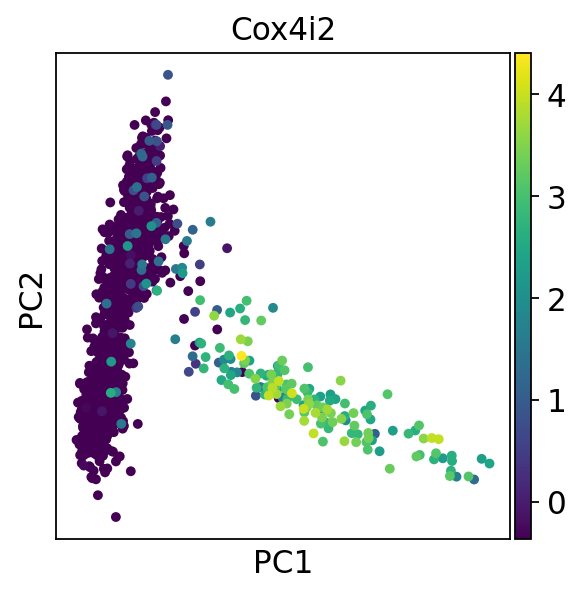

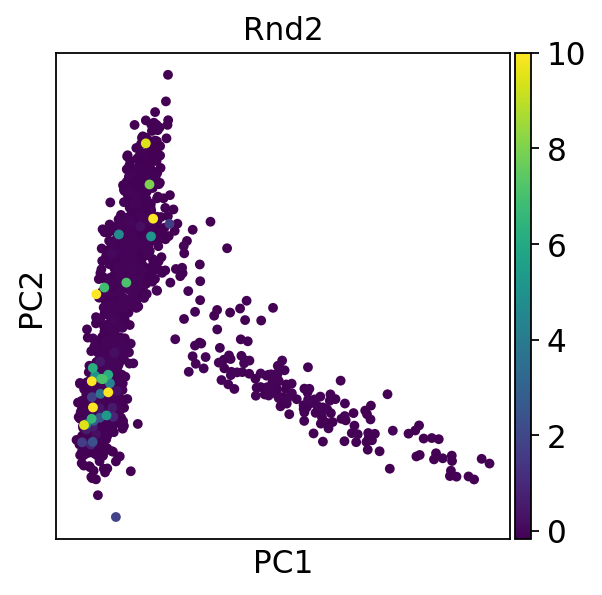

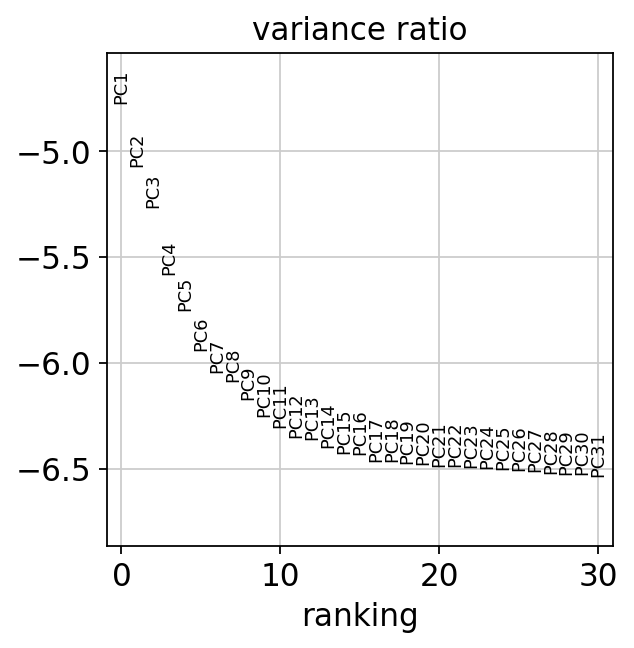

In [15]:
sc.pl.pca(adata,color='Cox4i2')
sc.pl.pca(adata,color='Rnd2')
sc.pl.pca_variance_ratio(adata, log=True)

In [16]:
adata.obs.columns

Index(['DC', 'Gender', 'Mousename', 'Plate', 'SortType', 'Time [days]',
       'Timepoint', 'TimepointHO', 'Treatment', 'Well', '_index',
       'cellRoughSubtype', 'cellSubtype', 'cellSubtypeOld', 'cellType',
       'coverage', 'doublet', 'embed_endo_1', 'embed_endo_2', 'fastq',
       'mese_tSNE_1', 'mese_tSNE_2', 'number_of_genes_1plusreads', 'n_genes',
       'n_genes_by_counts', 'total_counts', 'total_counts_mt',
       'pct_counts_mt'],
      dtype='object')

In [17]:
adata.var.shape

(6925, 18)

In [18]:
adata.varm

AxisArrays with keys: PCs

In [19]:
adata.varp

PairwiseArrays with keys: 

In [20]:
adata.varm['PCs'].shape

(6925, 50)

In [21]:
adata.varm['PCs'][2,19]

-0.007651403546333313

In [22]:
loading=adata.varm['PCs']
loading[:,0].max()
loading[:,0].min()

-0.0658256784081459

In [23]:
loading[:,0].argmax()

476

In [24]:
loading[:,0].argmin()

4219

In [25]:
adata.var_names[loading[:,0].argmax()]

'Cox4i2'

In [26]:
adata.var_names[1214]

'Ogn'

In [27]:
loading[:,0].argsort()

array([4219,  794, 3177, ..., 1793, 1398,  476])

In [28]:
adata.var_names[82]

'Rnd2'

In [29]:
loading[:,0].argsort()[-2]
adata.var_names[82]

'Rnd2'

In [30]:
adata.var_names[loading[:,0].argsort()[-2]]

'Pdzd2'

In [31]:
adata.obsm['X_pca'].shape

(1539, 50)

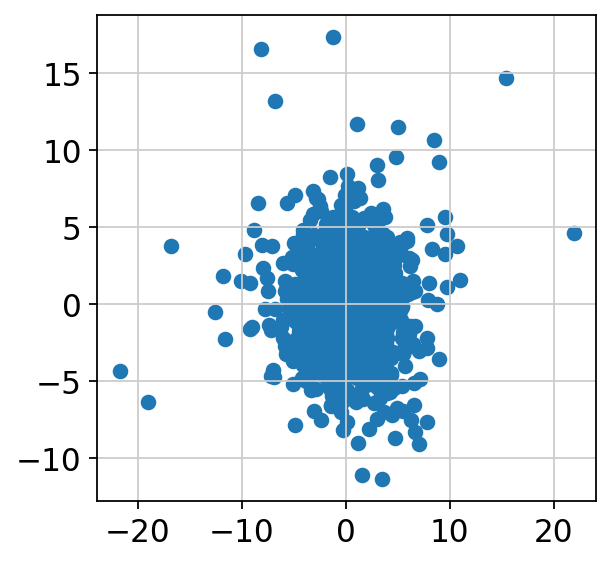

In [32]:
x=adata.obsm['X_pca'][:,24]
y=adata.obsm['X_pca'][:,49]
import matplotlib.pyplot as plt
plt.scatter(x,y)

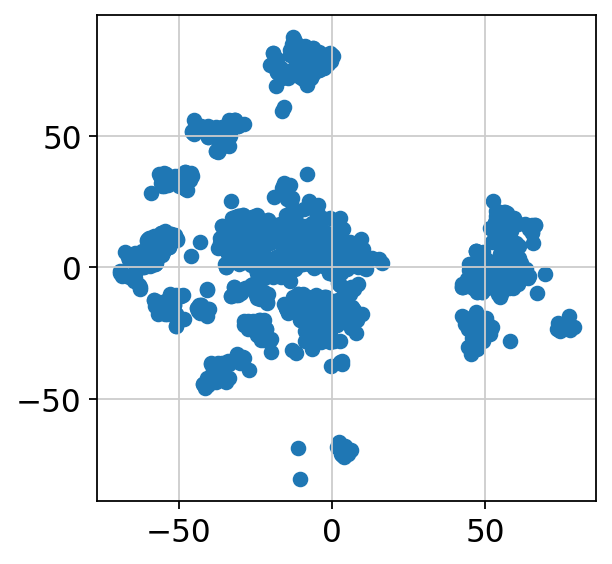

In [33]:
x=adata.obs['mese_tSNE_1']
y=adata.obs['mese_tSNE_2']
plt.scatter(x,y)

In [34]:
cells_embryo=adata.obs['Timepoint']=='E18.5'
cells_embryo
adata_embryo=adata[cells_embryo]
adata_embryo

/usr/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 282 × 6925
    obs: 'DC', 'Gender', 'Mousename', 'Plate', 'SortType', 'Time [days]', 'Timepoint', 'TimepointHO', 'Treatment', 'Well', '_index', 'cellRoughSubtype', 'cellSubtype', 'cellSubtypeOld', 'cellType', 'coverage', 'doublet', 'embed_endo_1', 'embed_endo_2', 'fastq', 'mese_tSNE_1', 'mese_tSNE_2', 'number_of_genes_1plusreads', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'Chromosome', 'Gene stable ID', 'Strand', '_index', 'missing_info', 'n_geneIds', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [35]:
Female=adata_embryo.obs['Gender']=='F'
Female
adata_female=adata_embryo[Female]
adata_female

View of AnnData object with n_obs × n_vars = 129 × 6925
    obs: 'DC', 'Gender', 'Mousename', 'Plate', 'SortType', 'Time [days]', 'Timepoint', 'TimepointHO', 'Treatment', 'Well', '_index', 'cellRoughSubtype', 'cellSubtype', 'cellSubtypeOld', 'cellType', 'coverage', 'doublet', 'embed_endo_1', 'embed_endo_2', 'fastq', 'mese_tSNE_1', 'mese_tSNE_2', 'number_of_genes_1plusreads', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'Chromosome', 'Gene stable ID', 'Strand', '_index', 'missing_info', 'n_geneIds', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [36]:
Male=adata_embryo.obs['Gender']=='M'
adata_male=adata_embryo[Male]

In [37]:
cells_maleDC35=adata_male.obs['DC']=='DC35'
adata_maleDC35=adata_male[cells_maleDC35]

In [38]:
cells_P1P7=adata.obs['Timepoint'].isin(['P1','P7'])  

In [39]:
adata.obs['cellSubtype'].value_counts()

Alveolar fibroblast                          509
Myofibroblast                                177
Fibroblast precursor                         156
Pericyte                                     143
Adventitial fibroblast                       113
Late alveolar fibroblast                     110
Vascular smooth muscle                        71
Late airway smooth muscle                     63
Myofibroblast and smooth muscle precursor     62
Late adventitial fibroblast                   58
Airway smooth muscle                          49
Proliferating fibroblast                      15
Proliferating myofibroblast                   11
Proliferating pericyte                         2
Name: cellSubtype, dtype: int64

In [40]:
cells_subtypes=adata.obs['cellSubtype'].isin(['Alveolar fibroblast','Fibroblast precursor','Adventitial fibroblast'])
adata_subtypes=adata[cells_subtypes]
adata_subtypes

View of AnnData object with n_obs × n_vars = 778 × 6925
    obs: 'DC', 'Gender', 'Mousename', 'Plate', 'SortType', 'Time [days]', 'Timepoint', 'TimepointHO', 'Treatment', 'Well', '_index', 'cellRoughSubtype', 'cellSubtype', 'cellSubtypeOld', 'cellType', 'coverage', 'doublet', 'embed_endo_1', 'embed_endo_2', 'fastq', 'mese_tSNE_1', 'mese_tSNE_2', 'number_of_genes_1plusreads', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'Chromosome', 'Gene stable ID', 'Strand', '_index', 'missing_info', 'n_geneIds', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
ranking genes


/usr/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/usr/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:407: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


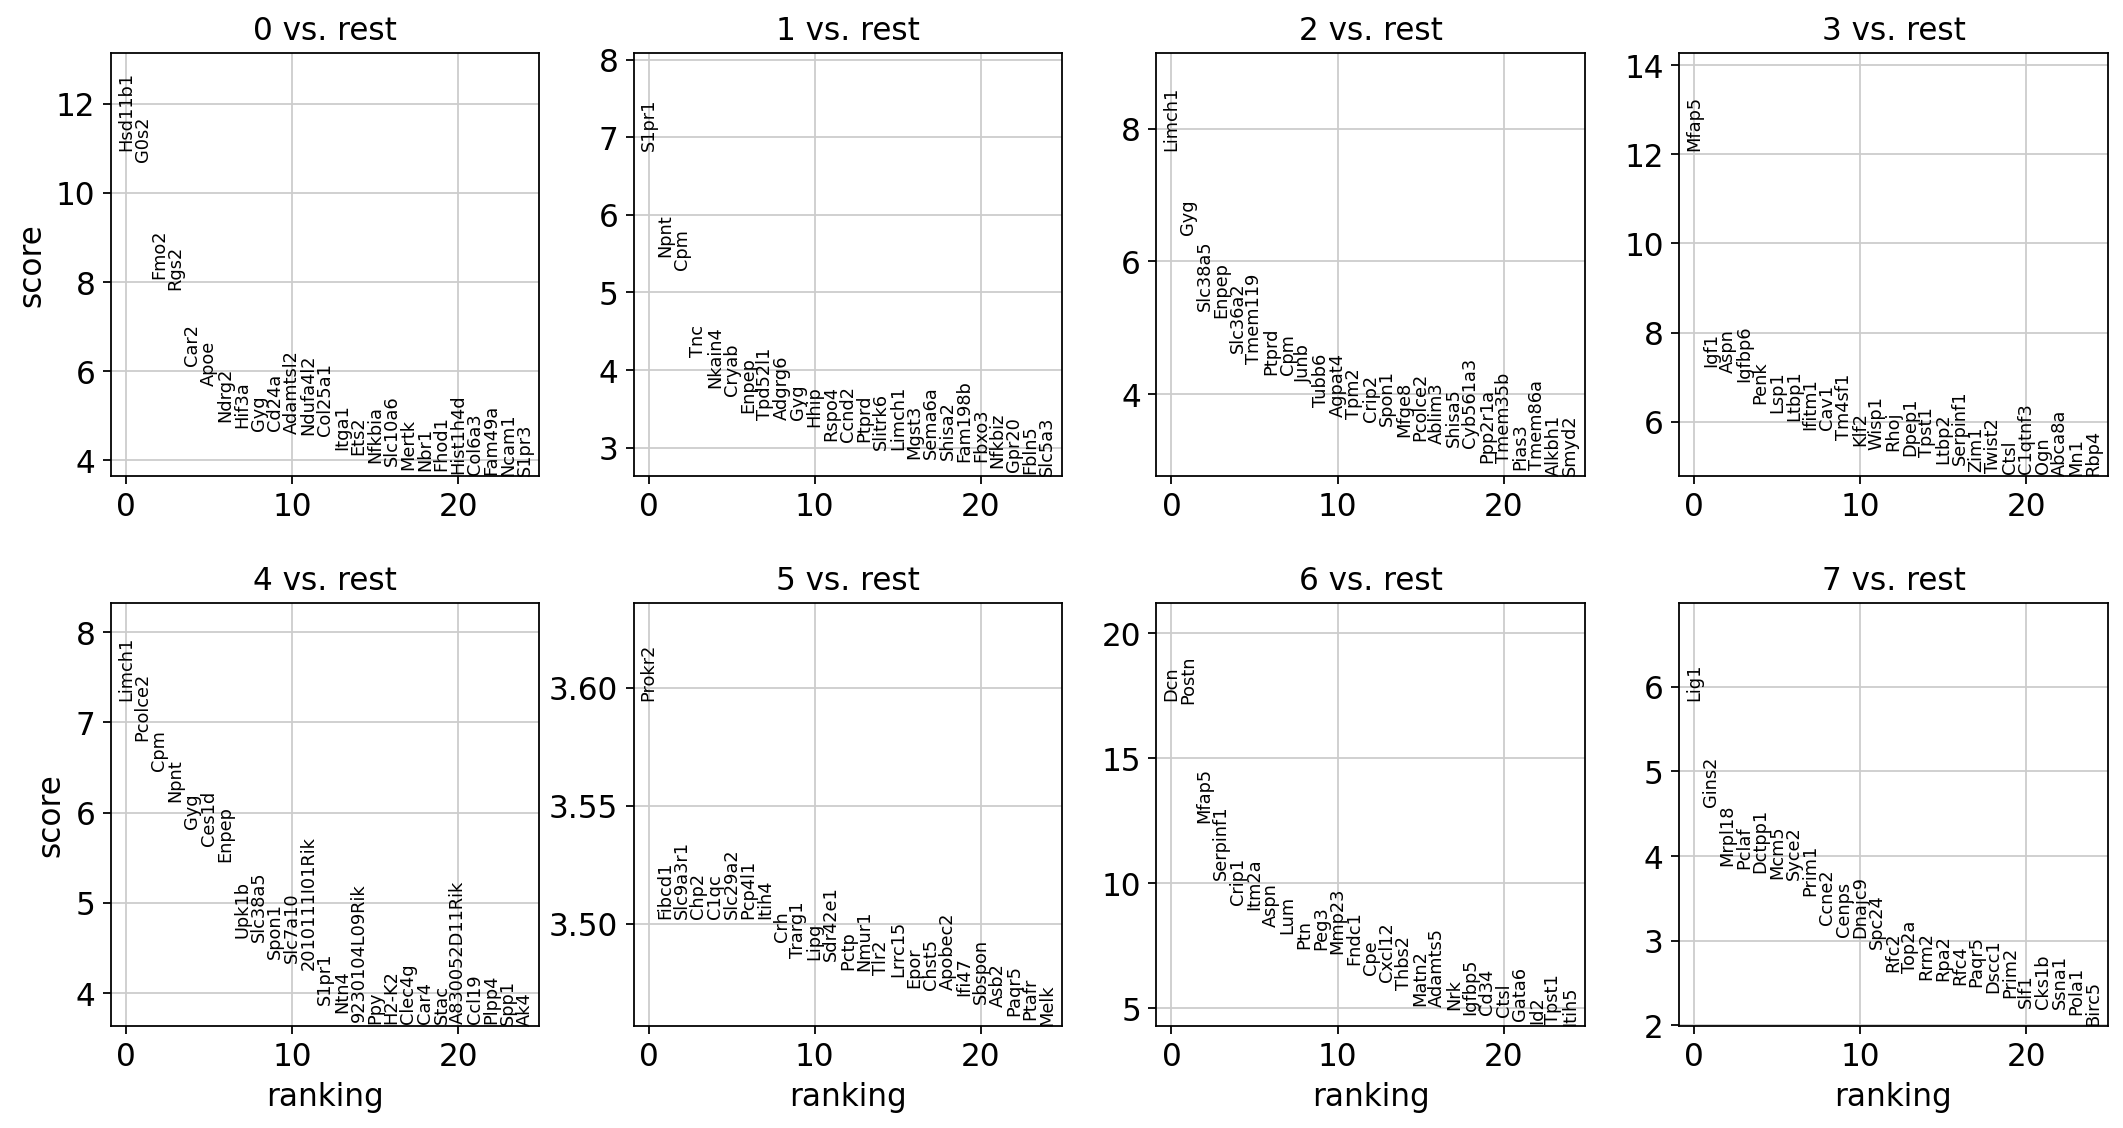

In [41]:
sc.pp.neighbors(adata_subtypes, n_neighbors=10, n_pcs=40)
sc.tl.leiden(adata_subtypes)
sc.tl.rank_genes_groups(adata_subtypes, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata_subtypes, n_genes=25, sharey=False)

In [ ]:
adata_precursor=adata[adata.obs['cellSubtype']=='Fibroblast precursor']
adata_adventitial_alveolar=adata[adata.obs['cellSubtype'].isin(['Adventitial fibroblast','Alveolar fibroblast'])]
exp1=adata_precursor[:,'Hsd11b1'].X.toarray()[:,0]
exp2=adata_adventitial_alveolar[:,'Hsd11b1'].X.toarray()[:,0]

In [ ]:
sns.violinplot(exp1)
sns.violinplot(exp2,color='red',alpha=0.2)

In [ ]:
sort_exp1=np.sort(exp1)
cumulative1=np.linspace(0,1,len(sort_exp1))
plt.plot(sort_exp1,cumulative1)

sort_exp2=np.sort(exp2)
cumulative2=np.linspace(0,1,len(sort_exp2))
plt.plot(sort_exp2,cumulative2)

In [ ]:
image1=plt.imread('figures/Rdh1.jpg')
image2=plt.imread('figures/Stra6.jpg')
image3=plt.imread('figures/Rbp1.jpg')

plt.figure()
plt.subplot(1,3,1)
plt.imshow(image1)
plt.subplot(1,3,2)
plt.imshow(image2)
plt.subplot(1,3,3)
plt.imshow(image3)
plt.show()